<a href="https://colab.research.google.com/github/khushipr/Parameter_Optimization_of_SVM/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [8]:
from google.colab import files
uploaded = files.upload()

Saving avila-tr.txt to avila-tr (1).txt


In [9]:
dataset = pd.read_csv('avila-tr.txt',header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


###Pre-Processing of Dataset

In [10]:
dataset.shape

(10430, 11)

In [11]:
dataset.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

<Axes: xlabel='10', ylabel='count'>

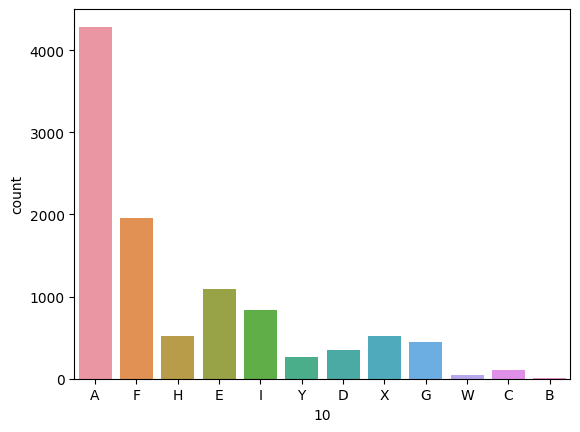

In [12]:
sns.countplot(x = 10, data=dataset)

In [13]:
X = dataset.iloc[:,0:-1]
y = dataset[10]

In [14]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.26752662, -0.05081531,  0.28702034, ...,  0.91633088,
         0.21906581,  0.15741816],
       [ 0.13056453,  0.21351533, -2.86569441, ...,  0.623723  ,
         0.24773501,  0.51116776],
       [-0.1184581 ,  0.00925972,  0.06160019, ..., -0.89546117,
        -0.12497006,  0.57804854],
       ...,
       [ 0.23017378, -0.00876266,  0.15367282, ..., -1.0950209 ,
        -0.55501443,  0.57527111],
       [-0.30522533,  0.08135001,  0.25844645, ...,  0.49074098,
         0.56310076,  0.71312682],
       [-0.10600682, -0.27309356,  0.3473445 , ..., -1.34322337,
         0.90713663, -0.54801956]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [15]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [16]:
samples

[(             0         1         2         3         4         5         6  \
  4170  0.019197 -0.338346 -0.358293 -0.113223  0.172340 -1.180006 -0.044076   
  9007  0.229043 -0.000745  0.171611 -0.002793  0.261718 -0.391033  0.220177   
  2025 -0.326430 -0.079257  0.239183  0.566935  0.261718  1.103861  0.182426   
  8767 -0.079554  0.179832  0.310311  1.179988 -1.257711  0.813187  0.371178   
  9561 -0.079554 -0.338346  0.409890  0.129748  0.172340 -0.474083  1.050686   
  ...        ...       ...       ...       ...       ...       ...       ...   
  9225  0.229043 -1.044953  0.349432  0.842430  0.261718  1.602159  0.371178   
  4859 -0.363462 -0.008597  0.256965 -0.226340  0.261718 -0.391033 -0.157328   
  3264  0.142636 -0.142067  0.246296  0.789259 -1.347089 -0.141884  0.597681   
  9845  0.438888  0.289748  0.143160 -0.282494  0.261718 -0.349509 -2.573354   
  2732 -0.030178 -0.063555  0.285416 -1.278877  0.172340 -0.723232 -0.081827   
  
               7         8         9 

### Creation of a Fitness Function

In [17]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [18]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [19]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.62 Best Kernel =  rbf Best Nu =  6.14 Best Epsilon =  6.65
Best Accuracy =  0.47 Best Kernel =  rbf Best Nu =  0.08 Best Epsilon =  8.52
Best Accuracy =  0.7 Best Kernel =  rbf Best Nu =  1.39 Best Epsilon =  3.47
Best Accuracy =  0.6 Best Kernel =  rbf Best Nu =  7.19 Best Epsilon =  7.6
Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  0.76 Best Epsilon =  7.73
Best Accuracy =  0.75 Best Kernel =  rbf Best Nu =  5.49 Best Epsilon =  1.95
Best Accuracy =  0.59 Best Kernel =  rbf Best Nu =  0.75 Best Epsilon =  5.46
Best Accuracy =  0.78 Best Kernel =  rbf Best Nu =  5.44 Best Epsilon =  0.68
Best Accuracy =  0.66 Best Kernel =  rbf Best Nu =  8.92 Best Epsilon =  4.62
Best Accuracy =  0.65 Best Kernel =  rbf Best Nu =  3.67 Best Epsilon =  4.86


###Creation of a Result Table

In [20]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.62,rbf,6.14,6.65
1,2,0.47,rbf,0.08,8.52
2,3,0.70,rbf,1.39,3.47
3,4,0.60,rbf,7.19,7.60
4,5,0.54,rbf,0.76,7.73
5,6,0.75,rbf,5.49,1.95
6,7,0.59,rbf,0.75,5.46
7,8,0.78,rbf,5.44,0.68
8,9,0.66,rbf,8.92,4.62
9,10,0.65,rbf,3.67,4.86


### Plotting of the Convergence Graph/Linear Curve

In [21]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [37]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter=1000), 
                                                        X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


In [38]:
train_sizes

array([  65,  198,  331,  463,  596,  729,  862,  994, 1127, 1260, 1393,
       1525, 1658, 1791, 1924, 2056, 2189, 2322, 2455, 2587, 2720, 2853,
       2985, 3118, 3251, 3384, 3516, 3649, 3782, 3915, 4047, 4180, 4313,
       4446, 4578, 4711, 4844, 4977, 5109, 5242, 5375, 5508, 5640, 5773,
       5906, 6039, 6171, 6304, 6437, 6570])

In [39]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

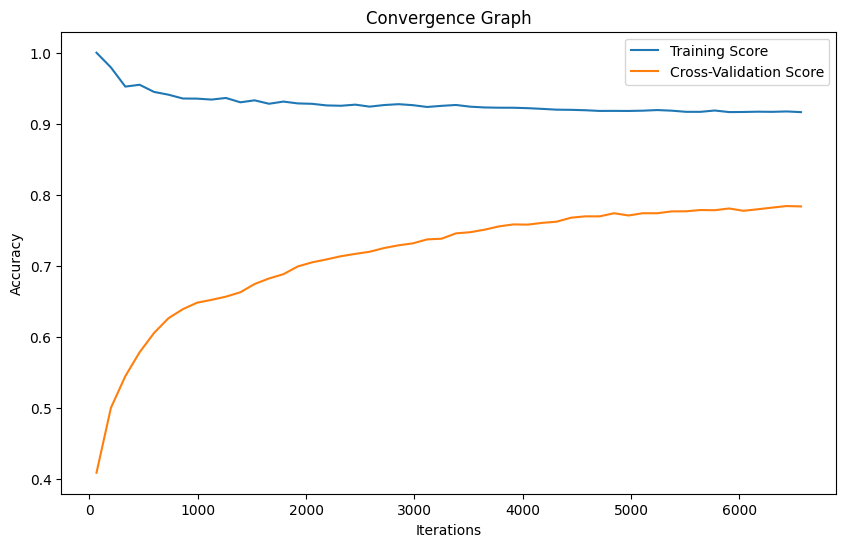

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()